# Real Estate Listings Price Prediction

In [1]:
#Senior Project 2020
#Kelsey Dinndorf

In [2]:
#What contributes to the price of a house?   --size, location, style, features, crime rate, proximity to good schools?

In [3]:
#Data: Real estate data scraped in 2019 from Trulia, a subsidiary of Zillow (from Kaggle)
# https://www.kaggle.com/promptcloud/real-estate-data-from-trulia

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stat
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [5]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

     |████████████████████████████████| 366 kB 13.6 MB/s eta 0:00:01


In [6]:
#import data
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_5a7f0d32e3f74da881228669190705da = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='d9GnnkKQVvMXW5ZW8Gwh_62JvBA6cy47uvCw8KCnxxkh',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_5a7f0d32e3f74da881228669190705da.get_object(Bucket='seniorproject-donotdelete-pr-6dm4jsyzpqluep',Key='marketing_sample_for_trulia_com-real_estate__20190901_20191031__30k_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Uniq Id,Crawl Timestamp,Url,Title,Description,Price,Image Url,Style,Sqr Ft,Longitude,...,Image 16,Image 17,Image 18,Image 19,Image 20,Image 21,Image 22,Image 23,Image 24,Image 25
0,d6521bac40600f17287f0a5a8b3efc8d,2019-09-19 05:40:24 +0000,https://www.trulia.com/p/az/phoenix/630-w-echo...,"630 W Echo Ln Phoenix, AZ 85021",NEW CONSTRUCTION in the North Central Corrido...,"$895,900",https://static.trulia-cdn.com/pictures/thumbs_...,4 Beds / 4.5 Baths,"3,447 sqft",-112.081985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,659d62537d940a76e3349bd39a72bd92,2019-09-19 03:48:41 +0000,https://www.trulia.com/p/tx/dallas/2367-highwo...,"2367 Highwood Dr Dallas, TX 75228",UPDATED EAST DALLAS HOME READY FOR MOVE-IN. H...,"$247,000",https://static.trulia-cdn.com/pictures/thumbs_...,3 Beds / 2 Baths,"1,767 sqft",-96.676250,...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...
2,a003f7017e34b3c8486ffd54cecf9f0d,2019-09-19 09:33:07 +0000,https://www.trulia.com/p/ny/buffalo/30-hurlock...,"30 Hurlock Ave Buffalo, NY 14211",This single-family home is located at 30 Hurl...,"$44,900",https://static.trulia-cdn.com/pictures/thumbs_...,3 Beds / 1 Bath,"1,232 sqft",-78.825190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bfee8b2ccc4ceaa91ebd92379b9ab73c,2019-09-22 01:08:10 +0000,https://www.trulia.com/p/ny/flushing/6416-alde...,"6416 Alderton St Flushing, NY 11374","Beautiful semi detached, ranch type corner ho...","$959,000",https://static.trulia-cdn.com/pictures/thumbs_...,3 Beds / 2 Baths,"1,417 sqft",-73.860170,...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...
4,01078a918e94a5d7975c66f9f679727a,2019-10-22 01:06:43 +0000,https://www.trulia.com/p/fl/miami-gardens/251-...,"251 NW 177th St #A-123 Miami Gardens, FL 33169","great investor opportunity!!! , beautiful stu...","$83,500",https://static.trulia-cdn.com/pictures/thumbs_...,Studio / 1 Bath,440 sqft,-80.206314,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape
#30006 rows, 68 columns/attributes

(30006, 68)

In [8]:
#prints dataframe attributes data types in series
print(df.dtypes[df.dtypes == 'object'])
#not object
print(df.dtypes[df.dtypes != 'object'])

#All attributes are objects or float64

Uniq Id                object
Crawl Timestamp        object
Url                    object
Title                  object
Description            object
Price                  object
Image Url              object
Style                  object
Sqr Ft                 object
Lot Size               object
Price Sqr Ft           object
Features               object
Last Sold For          object
Last Tax Assestment    object
Address                object
City                   object
State                  object
Property Type          object
Address Full           object
Facts                  object
Image 1                object
Image 2                object
Image 3                object
Image 4                object
Image 5                object
Image 6                object
Image 7                object
Image 8                object
Image 9                object
Image 10               object
Image 11               object
Image 12               object
Image 13               object
Image 14  

In [9]:
#Statistical analysis of data distribution
print(df.describe(include="all"))

                                 Uniq Id            Crawl Timestamp  \
count                              30006                      30006   
unique                             30006                      27461   
top     942a6722f501b6a22a36a37c3454403b  2019-09-19 23:01:29 +0000   
freq                                   1                          4   
mean                                 NaN                        NaN   
std                                  NaN                        NaN   
min                                  NaN                        NaN   
25%                                  NaN                        NaN   
50%                                  NaN                        NaN   
75%                                  NaN                        NaN   
max                                  NaN                        NaN   

                                                      Url  \
count                                               30006   
unique                   

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30006 entries, 0 to 30005
Data columns (total 68 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Uniq Id                   30006 non-null  object 
 1   Crawl Timestamp           30006 non-null  object 
 2   Url                       30006 non-null  object 
 3   Title                     30006 non-null  object 
 4   Description               29984 non-null  object 
 5   Price                     30006 non-null  object 
 6   Image Url                 28577 non-null  object 
 7   Style                     27637 non-null  object 
 8   Sqr Ft                    27786 non-null  object 
 9   Longitude                 30006 non-null  float64
 10  Latitude                  30006 non-null  float64
 11  Home Id                   30004 non-null  float64
 12  Lot Size                  25490 non-null  object 
 13  Beds                      27420 non-null  float64
 14  Bath  

In [11]:
df.drop_duplicates()
print(df.shape)
#No duplicate rows

(30006, 68)


In [12]:
#Find missing values
df.isnull().sum()

Uniq Id                0
Crawl Timestamp        0
Url                    0
Title                  0
Description           22
                   ...  
Image 21           14953
Image 22           15659
Image 23           16415
Image 24           17126
Image 25           17973
Length: 68, dtype: int64

In [13]:
#drop uneeded columns/ columns with too many null values
df.drop("Crawl Timestamp", axis = 1, inplace=True)
df.drop("Url", axis = 1, inplace=True)
df.drop("Title", axis = 1, inplace=True)
df.drop("Description", axis = 1, inplace=True)
df.drop("Image Url", axis = 1, inplace=True)
df.drop("Home Id", axis = 1, inplace=True)
df.drop("Address", axis = 1, inplace=True)
df.drop("Property Type", axis = 1, inplace=True)
df.drop("Address Full", axis = 1, inplace=True)
df.drop("Facts", axis = 1, inplace=True)
df.drop("Listing Agent Name", axis = 1, inplace=True)
df1=df
print(df1.head())

                            Uniq Id      Price               Style  \
0  d6521bac40600f17287f0a5a8b3efc8d  $895,900   4 Beds / 4.5 Baths   
1  659d62537d940a76e3349bd39a72bd92  $247,000     3 Beds / 2 Baths   
2  a003f7017e34b3c8486ffd54cecf9f0d   $44,900      3 Beds / 1 Bath   
3  bfee8b2ccc4ceaa91ebd92379b9ab73c  $959,000     3 Beds / 2 Baths   
4  01078a918e94a5d7975c66f9f679727a   $83,500      Studio / 1 Bath   

       Sqr Ft   Longitude   Latitude    Lot Size  Beds  Bath  Year Built  ...  \
0  3,447 sqft -112.081985  33.560055  7,895 sqft   4.0   4.5      2019.0  ...   
1  1,767 sqft  -96.676250  32.829227  7,877 sqft   3.0   2.0      1954.0  ...   
2  1,232 sqft  -78.825190  42.913000  3,510 sqft   3.0   1.0      1900.0  ...   
3  1,417 sqft  -73.860170  40.722960  2,598 sqft   3.0   2.0      1939.0  ...   
4    440 sqft  -80.206314  25.937965         NaN   NaN   1.0      1971.0  ...   

                                            Image 16  \
0                                   

In [14]:
#Find column number for "Days on Trulia" --want to get rid of all columns after this one (agents and images)
df1.columns.get_loc("Days On Trulia")

19

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30006 entries, 0 to 30005
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Uniq Id                   30006 non-null  object 
 1   Price                     30006 non-null  object 
 2   Style                     27637 non-null  object 
 3   Sqr Ft                    27786 non-null  object 
 4   Longitude                 30006 non-null  float64
 5   Latitude                  30006 non-null  float64
 6   Lot Size                  25490 non-null  object 
 7   Beds                      27420 non-null  float64
 8   Bath                      27496 non-null  float64
 9   Year Built                26258 non-null  float64
 10  Price Sqr Ft              27271 non-null  object 
 11  Features                  30006 non-null  object 
 12  Last Sold Year            14213 non-null  float64
 13  Last Sold For             14213 non-null  object 
 14  Last T

In [16]:
#drop all columns after column 20 (agents and image columns have too many missing values, not needed)
df2 = df1.drop(df.columns[20:], axis=1)
df2

,Uniq Id,Price,Style,Sqr Ft,Longitude,Latitude,Lot Size,Beds,Bath,Year Built,Price Sqr Ft,Features,Last Sold Year,Last Sold For,Last Tax Assestment,Last Tax Year,City,State,Zipcode,Days On Trulia
0,d6521bac40600f17287f0a5a8b3efc8d,"$895,900",4 Beds / 4.5 Baths,"3,447 sqft",-112.081985,33.560055,"7,895 sqft",4.0,4.5,2019.0,$260/sqft,"Single Family Home | $260/sqft | Lot Size: 7,8...",NaN,NaN,"$27,645",2018.0,Phoenix,AZ,85021.0,110.0
1,659d62537d940a76e3349bd39a72bd92,"$247,000",3 Beds / 2 Baths,"1,767 sqft",-96.676250,32.829227,"7,877 sqft",3.0,2.0,1954.0,$140/sqft,"Single Family Home | $140/sqft | Lot Size: 7,8...",NaN,NaN,NaN,NaN,Dallas,TX,75228.0,126.0
2,a003f7017e34b3c8486ffd54cecf9f0d,"$44,900",3 Beds / 1 Bath,"1,232 sqft",-78.825190,42.913000,"3,510 sqft",3.0,1.0,1900.0,$36/sqft,"Single Family Home | $36/sqft | Lot Size: 3,51...",NaN,NaN,"$7,000",2016.0,Buffalo,NY,14211.0,44.0
3,bfee8b2ccc4ceaa91ebd92379b9ab73c,"$959,000",3 Beds / 2 Baths,"1,417 sqft",-73.860170,40.722960,"2,598 sqft",3.0,2.0,1939.0,$677/sqft,"Single Family Home | $677/sqft | Lot Size: 2,5...",2009.0,"$532,000","$34,951",2018.0,Flushing,NY,11374.0,2.0
4,01078a918e94a5d7975c66f9f679727a,"$83,500",Studio / 1 Bath,440 sqft,-80.206314,25.937965,NaN,NaN,1.0,1971.0,$190/sqft,Condo | $190/sqft | $140/monthly HOA | Built i...,2007.0,"$52,000","$53,751",2018.0,Miami Gardens,FL,33169.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30001,abea7de20e824a9060af2d724861d853,"$300,000",1 Bed / 1 Bath,733 sqft,-80.187720,25.771372,NaN,1.0,1.0,2008.0,$409/sqft,Condo | $409/sqft | $604/monthly HOA | Built i...,2014.0,"$345,000","$231,454",2018.0,Miami,FL,33131.0,90.0
30002,a530e0df4974dec23e72dd099c305b5a,"$119,000",3 Beds / 2 Baths,"1,716 sqft",-121.031560,37.680702,18.84 acres,3.0,2.0,1998.0,$69/sqft,Mobile Manufactured | $69/sqft | Lot Size: 18....,NaN,NaN,"$44,900",2011.0,Modesto,CA,95350.0,NaN
30003,52e118249e9adfc74ca5404c3014b4bb,"$210,000",NaN,NaN,-91.137700,30.440481,8276 sqft,NaN,NaN,NaN,NaN,Lot Land | Lot Size: 8276 sqft | 59 Days on Tr...,NaN,NaN,NaN,NaN,Baton Rouge,LA,70806.0,59.0
30004,dc40db1cf828bcc683950b6e9b1a3849,"$329,000",7 Beds / 3 Baths,NaN,-73.913930,40.699930,NaN,7.0,3.0,2007.0,NaN,Multi Family | Built in 2007 | 2 Days on Truli...,NaN,NaN,NaN,NaN,Brooklyn,NY,11237.0,2.0


In [17]:
#how many null values under each attribute?
df2.isnull().sum()

Uniq Id                    0
Price                      0
Style                   2369
Sqr Ft                  2220
Longitude                  0
Latitude                   0
Lot Size                4516
Beds                    2586
Bath                    2510
Year Built              3748
Price Sqr Ft            2735
Features                   0
Last Sold Year         15793
Last Sold For          15793
Last Tax Assestment    11761
Last Tax Year          11838
City                       0
State                      0
Zipcode                    3
Days On Trulia          5162
dtype: int64

In [18]:
#what to do with null values? Replace with average? Delete rows?

In [19]:
#Price is a string -- get rid of all sting values (, $), then convert to float
df2['Price'] = df2['Price'].str.replace("[^0-9.]","")  #only keep numbers and decimal

#convert to numeric
df2["Price"] = pd.to_numeric(df2["Price"]) 
#round to 2 decimal places
df2["Price"] = df2["Price"].round(decimals = 2)
df2["Price"]

0         895900.0
1         247000.0
2          44900.0
3         959000.0
4          83500.0
           ...    
30001     300000.0
30002     119000.0
30003     210000.0
30004     329000.0
30005    4500000.0
Name: Price, Length: 30006, dtype: float64

In [20]:
#Last Sold For is a string -- get rid of all sting values (, $), then convert to float
df2['Last Sold For'] = df2['Last Sold For'].str.replace("[^0-9.]","")

#convert to numeric
df2["Last Sold For"] = pd.to_numeric(df2["Last Sold For"]) 
#round to 2 decimal places
df2["Last Sold For"] = df2["Last Sold For"].round(decimals = 2)
df2["Last Sold For"]

0              NaN
1              NaN
2              NaN
3         532000.0
4          52000.0
           ...    
30001     345000.0
30002          NaN
30003          NaN
30004          NaN
30005    5500000.0
Name: Last Sold For, Length: 30006, dtype: float64

In [21]:
#Last Tax Assestment -- get rid of all sting values (, $), then convert to float
df2['Last Tax Assestment'] = df2['Last Tax Assestment'].str.replace("[^0-9.]","") 

#convert to numeric
df2["Last Tax Assestment"] = pd.to_numeric(df2["Last Tax Assestment"]) 
#round to 2 decimal places
df2["Last Tax Assestment"] = df2["Last Tax Assestment"].round(decimals = 2)
df2["Last Tax Assestment"]

0          27645.0
1              NaN
2           7000.0
3          34951.0
4          53751.0
           ...    
30001     231454.0
30002      44900.0
30003          NaN
30004          NaN
30005    3275328.0
Name: Last Tax Assestment, Length: 30006, dtype: float64

In [22]:
#Sqr Ft is a string -- convert to float (Total square feet of the home)
df2['Sqr Ft'] = df2['Sqr Ft'].str.replace("[^0-9.]","")

#convert to numeric
df2["Sqr Ft"] = pd.to_numeric(df2["Sqr Ft"])    
df2["Sqr Ft"]

0         3447.0
1         1767.0
2         1232.0
3         1417.0
4          440.0
          ...   
30001      733.0
30002     1716.0
30003        NaN
30004        NaN
30005    10149.0
Name: Sqr Ft, Length: 30006, dtype: float64

In [23]:
#Lot Size is a string -- (Total lot size -> some are in square feet, some in acres)   1 acre = 43560 sq ft
df2['LotSizenumbers'] = df2['Lot Size'].str.replace("[^0-9.]","")  #only keep the numbers and decimal point
df2["LotSizenumbers"] = pd.to_numeric(df2["LotSizenumbers"])   #change from string to numeric
acres = df2['LotSizenumbers'] * 43560                          #acres to sq ft
Acrescontain = df2['Lot Size'].str.contains("acres")           #observations that contain the string 'acres'

In [24]:
#check numbers for Lot Size after getting rid of text and converting to numeric
df2['LotSizenumbers']

0        7895.00
1        7877.00
2        3510.00
3        2598.00
4            NaN
          ...   
30001        NaN
30002      18.84
30003    8276.00
30004        NaN
30005       5.28
Name: LotSizenumbers, Length: 30006, dtype: float64

In [25]:
#Create new column for lot size all in sq ft
numbers = df2["LotSizenumbers"]
LotSize_2 = np.where(Acrescontain, acres, numbers)   #where cell contains 'acres', multiply by 43560, otherwise give original number(sq ft)
df2['Lot Size_2'] = LotSize_2
df2[['Lot Size', 'LotSizenumbers','Lot Size_2']]

,Lot Size,LotSizenumbers,Lot Size_2
0,"7,895 sqft",7895.00,7895.0
1,"7,877 sqft",7877.00,7877.0
2,"3,510 sqft",3510.00,3510.0
3,"2,598 sqft",2598.00,2598.0
4,NaN,NaN,NaN
...,...,...,...
30001,NaN,NaN,NaN
30002,18.84 acres,18.84,820670.4
30003,8276 sqft,8276.00,8276.0
30004,NaN,NaN,NaN


In [26]:
#rename new Lot Size column (all in sq ft)
df2.rename(columns = {'Lot Size_2':'Lot Size(sqft)'}, inplace = True)

In [27]:
#drop unneeded columns
df2.drop("Lot Size", axis = 1, inplace=True)
df2.drop("LotSizenumbers", axis = 1, inplace=True)
#define new data frame
df3 = df2
df3

,Uniq Id,Price,Style,Sqr Ft,Longitude,Latitude,Beds,Bath,Year Built,Price Sqr Ft,Features,Last Sold Year,Last Sold For,Last Tax Assestment,Last Tax Year,City,State,Zipcode,Days On Trulia,Lot Size(sqft)
0,d6521bac40600f17287f0a5a8b3efc8d,895900.0,4 Beds / 4.5 Baths,3447.0,-112.081985,33.560055,4.0,4.5,2019.0,$260/sqft,"Single Family Home | $260/sqft | Lot Size: 7,8...",NaN,NaN,27645.0,2018.0,Phoenix,AZ,85021.0,110.0,7895.0
1,659d62537d940a76e3349bd39a72bd92,247000.0,3 Beds / 2 Baths,1767.0,-96.676250,32.829227,3.0,2.0,1954.0,$140/sqft,"Single Family Home | $140/sqft | Lot Size: 7,8...",NaN,NaN,NaN,NaN,Dallas,TX,75228.0,126.0,7877.0
2,a003f7017e34b3c8486ffd54cecf9f0d,44900.0,3 Beds / 1 Bath,1232.0,-78.825190,42.913000,3.0,1.0,1900.0,$36/sqft,"Single Family Home | $36/sqft | Lot Size: 3,51...",NaN,NaN,7000.0,2016.0,Buffalo,NY,14211.0,44.0,3510.0
3,bfee8b2ccc4ceaa91ebd92379b9ab73c,959000.0,3 Beds / 2 Baths,1417.0,-73.860170,40.722960,3.0,2.0,1939.0,$677/sqft,"Single Family Home | $677/sqft | Lot Size: 2,5...",2009.0,532000.0,34951.0,2018.0,Flushing,NY,11374.0,2.0,2598.0
4,01078a918e94a5d7975c66f9f679727a,83500.0,Studio / 1 Bath,440.0,-80.206314,25.937965,NaN,1.0,1971.0,$190/sqft,Condo | $190/sqft | $140/monthly HOA | Built i...,2007.0,52000.0,53751.0,2018.0,Miami Gardens,FL,33169.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30001,abea7de20e824a9060af2d724861d853,300000.0,1 Bed / 1 Bath,733.0,-80.187720,25.771372,1.0,1.0,2008.0,$409/sqft,Condo | $409/sqft | $604/monthly HOA | Built i...,2014.0,345000.0,231454.0,2018.0,Miami,FL,33131.0,90.0,NaN
30002,a530e0df4974dec23e72dd099c305b5a,119000.0,3 Beds / 2 Baths,1716.0,-121.031560,37.680702,3.0,2.0,1998.0,$69/sqft,Mobile Manufactured | $69/sqft | Lot Size: 18....,NaN,NaN,44900.0,2011.0,Modesto,CA,95350.0,NaN,820670.4
30003,52e118249e9adfc74ca5404c3014b4bb,210000.0,NaN,NaN,-91.137700,30.440481,NaN,NaN,NaN,NaN,Lot Land | Lot Size: 8276 sqft | 59 Days on Tr...,NaN,NaN,NaN,NaN,Baton Rouge,LA,70806.0,59.0,8276.0
30004,dc40db1cf828bcc683950b6e9b1a3849,329000.0,7 Beds / 3 Baths,NaN,-73.913930,40.699930,7.0,3.0,2007.0,NaN,Multi Family | Built in 2007 | 2 Days on Truli...,NaN,NaN,NaN,NaN,Brooklyn,NY,11237.0,2.0,NaN


In [28]:
#drop "style" column -beds/baths already in another attribute
df3.drop("Style", axis = 1, inplace=True)

In [29]:
df3.head()
#Categorical Variables: longitude, latitude, Year built, features, last sold year, last tax year, city, state, zipcode
#Quantitative Variables: Price, Sqr Ft, Beds, Bath, Last Sold For, Last tax assestment, days on Trulia, Lot Size, and Price per Sqr Ft

,Uniq Id,Price,Sqr Ft,Longitude,Latitude,Beds,Bath,Year Built,Price Sqr Ft,Features,Last Sold Year,Last Sold For,Last Tax Assestment,Last Tax Year,City,State,Zipcode,Days On Trulia,Lot Size(sqft)
0,d6521bac40600f17287f0a5a8b3efc8d,895900.0,3447.0,-112.081985,33.560055,4.0,4.5,2019.0,$260/sqft,"Single Family Home | $260/sqft | Lot Size: 7,8...",NaN,NaN,27645.0,2018.0,Phoenix,AZ,85021.0,110.0,7895.0
1,659d62537d940a76e3349bd39a72bd92,247000.0,1767.0,-96.676250,32.829227,3.0,2.0,1954.0,$140/sqft,"Single Family Home | $140/sqft | Lot Size: 7,8...",NaN,NaN,NaN,NaN,Dallas,TX,75228.0,126.0,7877.0
2,a003f7017e34b3c8486ffd54cecf9f0d,44900.0,1232.0,-78.825190,42.913000,3.0,1.0,1900.0,$36/sqft,"Single Family Home | $36/sqft | Lot Size: 3,51...",NaN,NaN,7000.0,2016.0,Buffalo,NY,14211.0,44.0,3510.0
3,bfee8b2ccc4ceaa91ebd92379b9ab73c,959000.0,1417.0,-73.860170,40.722960,3.0,2.0,1939.0,$677/sqft,"Single Family Home | $677/sqft | Lot Size: 2,5...",2009.0,532000.0,34951.0,2018.0,Flushing,NY,11374.0,2.0,2598.0
4,01078a918e94a5d7975c66f9f679727a,83500.0,440.0,-80.206314,25.937965,NaN,1.0,1971.0,$190/sqft,Condo | $190/sqft | $140/monthly HOA | Built i...,2007.0,52000.0,53751.0,2018.0,Miami Gardens,FL,33169.0,NaN,NaN


# Deal with Missing Values

In [30]:
#check number of missing values for each attribute
df3.isnull().sum()

Uniq Id                    0
Price                    227
Sqr Ft                  2220
Longitude                  0
Latitude                   0
Beds                    2586
Bath                    2510
Year Built              3748
Price Sqr Ft            2735
Features                   0
Last Sold Year         15793
Last Sold For          15793
Last Tax Assestment    11761
Last Tax Year          11838
City                       0
State                      0
Zipcode                    3
Days On Trulia          5162
Lot Size(sqft)          4516
dtype: int64

In [31]:
#replace missing values for price with the mean
mean=df3["Price"].mean()   #find mean

df3["Price"].fillna(mean, inplace=True)   #fill cells with no value with the mean

print(mean)
print(df3['Price'])

529807.2961147117
0         895900.0
1         247000.0
2          44900.0
3         959000.0
4          83500.0
           ...    
30001     300000.0
30002     119000.0
30003     210000.0
30004     329000.0
30005    4500000.0
Name: Price, Length: 30006, dtype: float64


In [32]:
#replace missing values for Sqr Ft with the mean
mean=df3["Sqr Ft"].mean()

df3["Sqr Ft"].fillna(mean, inplace=True)

print(mean)
print(df3['Sqr Ft'])

5082.979414093428
0         3447.000000
1         1767.000000
2         1232.000000
3         1417.000000
4          440.000000
             ...     
30001      733.000000
30002     1716.000000
30003     5082.979414
30004     5082.979414
30005    10149.000000
Name: Sqr Ft, Length: 30006, dtype: float64


In [33]:
#replace missing values for Beds with the mode
mode=df3["Beds"].mode()[0]

df3["Beds"].fillna(mode, inplace=True)

print(mode)
print(df3['Beds'])

3.0
0        4.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
30001    1.0
30002    3.0
30003    3.0
30004    7.0
30005    4.0
Name: Beds, Length: 30006, dtype: float64


In [34]:
#replace missing values for Bath with the mode
mode=df3["Bath"].mode()[0]

df3["Bath"].fillna(mode, inplace=True)

print(mode)
print(df3['Bath'])

2.0
0        4.5
1        2.0
2        1.0
3        2.0
4        1.0
        ... 
30001    1.0
30002    2.0
30003    2.0
30004    3.0
30005    9.0
Name: Bath, Length: 30006, dtype: float64


In [35]:
print(df3['Bath'].value_counts(ascending=False))

2.00     12776
3.00      7018
1.00      4280
4.00      2732
2.50       950
5.00       834
6.00       369
3.50       347
7.00       148
4.50       115
8.00        93
1.50        90
1.75        71
9.00        42
5.50        28
10.00       22
2.75        12
11.00       11
2.10        10
12.00        9
3.75         6
13.00        5
2.25         4
1.10         4
3.10         3
3.25         3
1.25         2
17.00        2
4.10         2
6.50         2
42.00        1
14.00        1
22.00        1
7.50         1
2.70         1
35.00        1
29.00        1
28.00        1
2.30         1
98.00        1
4.75         1
16.00        1
0.75         1
24.00        1
4.70         1
36.00        1
Name: Bath, dtype: int64


In [36]:
## Should I replace missing values with mean or mode for the year built??
#replace missing values for Year Built with the mean
mean=df3["Year Built"].mean()
mode = df3["Year Built"].mode()

#df3["Year Built"].fillna(mean, inplace=True)

print(mean)
print(mode)
#print(df3['Year Built'])

1973.1402239317542
0    2019.0
dtype: float64


In [37]:
print(df3['Year Built'].value_counts(ascending=False))

2019.0    1547
2006.0     615
2005.0     553
2007.0     536
1920.0     534
          ... 
1854.0       1
1882.0       1
1872.0       1
1816.0       1
1877.0       1
Name: Year Built, Length: 166, dtype: int64


In [38]:
#replace missing values for Days On Trulia with the mean
mean=df3["Days On Trulia"].mean()
mean=mean.round()
df3["Days On Trulia"].fillna(mean, inplace=True)

print(mean)
print(df3['Days On Trulia'])

68.0
0        110.0
1        126.0
2         44.0
3          2.0
4         68.0
         ...  
30001     90.0
30002     68.0
30003     59.0
30004      2.0
30005    180.0
Name: Days On Trulia, Length: 30006, dtype: float64


In [39]:
#replace missing values for Lot Size(sqft) with the mean
mean=df3["Lot Size(sqft)"].mean()

df3["Lot Size(sqft)"].fillna(mean, inplace=True)

print(mean)
print(df3['Lot Size(sqft)'])

92933.22244017261
0          7895.00000
1          7877.00000
2          3510.00000
3          2598.00000
4         92933.22244
             ...     
30001     92933.22244
30002    820670.40000
30003      8276.00000
30004     92933.22244
30005    229996.80000
Name: Lot Size(sqft), Length: 30006, dtype: float64


In [40]:
#delete rows with missing values for zipcode since only 3 missing values
df3 = df3.dropna(axis=0, subset=['Zipcode'])
df3.shape

(30003, 19)

In [41]:
#create new column to calculate price per square foot instead of using the attribute provided
df3['Price per Sqft'] = df3['Price'] / df3['Sqr Ft']
#round to 2 decimals
df3['Price per Sqft']= df3['Price per Sqft'].round(decimals = 2)

df3['Price per Sqft']

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0        259.91
1        139.78
2         36.44
3        676.78
4        189.77
          ...  
30001    409.28
30002     69.35
30003     41.31
30004     64.73
30005    443.39
Name: Price per Sqft, Length: 30003, dtype: float64

In [42]:
#drop original price sqr ft column
df3.drop("Price Sqr Ft", axis = 1, inplace=True)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [43]:
df3.isnull().sum()

Uniq Id                    0
Price                      0
Sqr Ft                     0
Longitude                  0
Latitude                   0
Beds                       0
Bath                       0
Year Built              3745
Features                   0
Last Sold Year         15790
Last Sold For          15790
Last Tax Assestment    11758
Last Tax Year          11835
City                       0
State                      0
Zipcode                    0
Days On Trulia             0
Lot Size(sqft)             0
Price per Sqft             0
dtype: int64

In [44]:
#What to do with missing values for these? Lots are missing
#Last Sold Year         15793
#Last Sold For          15793
#Last Tax Assestment    11761
#Last Tax Year          11838

In [45]:
#What to do with year built missing values

# Visualizations

In [46]:
## Categorical Attributes ##

In [47]:
#How many of each year?
print(df3['Year Built'].value_counts())
#Years range from 1877 to 2019
#Many are built in 2019

2019.0    1547
2006.0     615
2005.0     553
2007.0     536
1920.0     534
          ... 
1854.0       1
1882.0       1
1872.0       1
1816.0       1
1877.0       1
Name: Year Built, Length: 166, dtype: int64


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165]),
 <a list of 166 Text major ticklabel objects>)

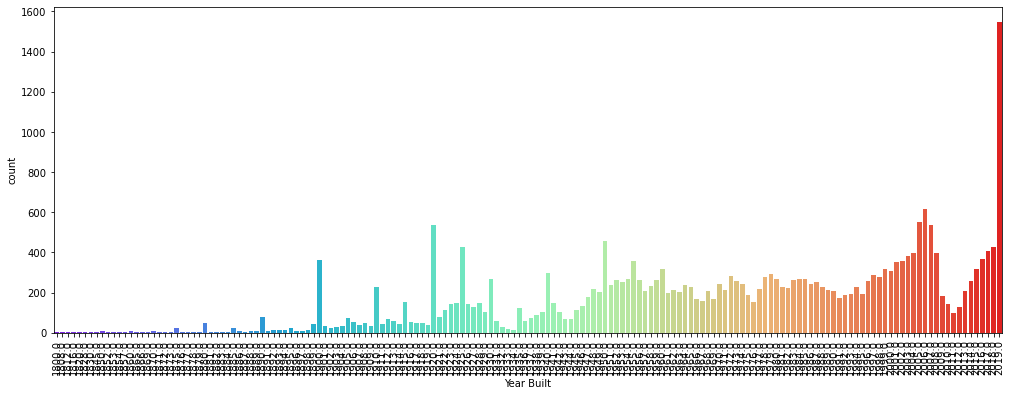

In [48]:
#Count plot of Year Built
plt.figure(figsize=(17,6))
sb.countplot(x='Year Built', data=df3, palette='rainbow')
plt.xticks(rotation=90)

In [49]:
#Which cities are most prevalent in the data?
print(df3['City'].value_counts())

Houston             1077
Chicago              985
San Antonio          951
Las Vegas            944
Miami                821
                    ... 
Bedford Heights        1
Glenn Heights          1
Piney Pt Village       1
Douglass Hills         1
Evendale               1
Name: City, Length: 675, dtype: int64


In [50]:
#Which states are most prevalet in the data?
state_counts = df3['State'].value_counts()
print(state_counts)
#Highest number of houses from Texas

TX    4899
FL    2721
CA    2718
AZ    1940
NV    1507
OH    1403
NY    1194
CO    1033
NC    1012
PA    1007
IL     986
GA     861
MN     781
VA     670
MD     659
TN     629
IN     567
WA     524
OK     521
LA     515
KY     469
MI     468
OR     432
WI     405
NE     388
NM     307
DC     227
MA     225
AL     199
AK     178
KS     168
ID     164
IA     163
NJ      63
Name: State, dtype: int64


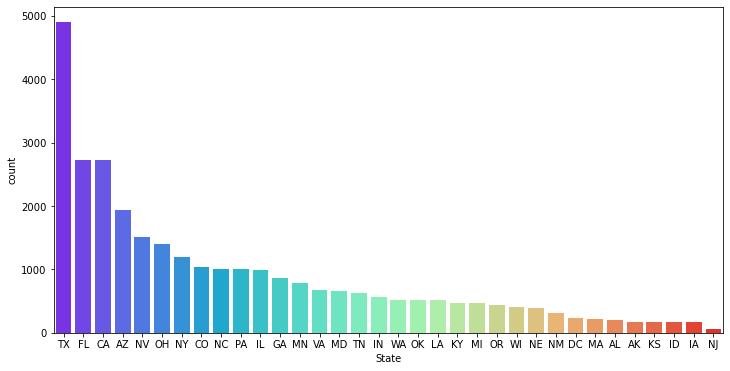

In [51]:
#Count plot of State
plt.figure(figsize=(12,6))
sb.countplot(x='State', data=df3, palette='rainbow', order=state_counts.index)

In [52]:
#Count of bedrooms
beds_counts = df3['Beds'].value_counts()
print(beds_counts)

#most common is 3 bedrooms

3.0     13512
4.0      6975
2.0      4990
5.0      2213
1.0      1329
6.0       624
7.0       143
8.0       104
9.0        42
10.0       23
12.0       15
11.0       10
20.0        3
14.0        3
44.0        2
18.0        2
15.0        2
16.0        2
64.0        2
13.0        1
35.0        1
27.0        1
24.0        1
65.0        1
36.0        1
23.0        1
Name: Beds, dtype: int64


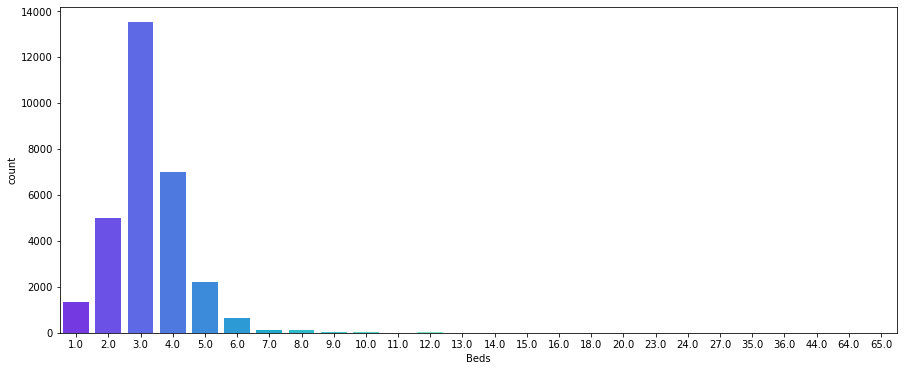

In [53]:
#Count plot of Beds
plt.figure(figsize=(15,6))
sb.countplot(x='Beds', data=df3, palette='rainbow')

In [54]:
#Count of bathrooms
bath_counts = df3['Bath'].value_counts()
print(bath_counts)

#most common is 2 bathrooms

2.00     12773
3.00      7018
1.00      4280
4.00      2732
2.50       950
5.00       834
6.00       369
3.50       347
7.00       148
4.50       115
8.00        93
1.50        90
1.75        71
9.00        42
5.50        28
10.00       22
2.75        12
11.00       11
2.10        10
12.00        9
3.75         6
13.00        5
2.25         4
1.10         4
3.10         3
3.25         3
1.25         2
17.00        2
4.10         2
6.50         2
42.00        1
14.00        1
22.00        1
7.50         1
2.70         1
35.00        1
29.00        1
28.00        1
2.30         1
98.00        1
4.75         1
16.00        1
0.75         1
24.00        1
4.70         1
36.00        1
Name: Bath, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 46 Text major ticklabel objects>)

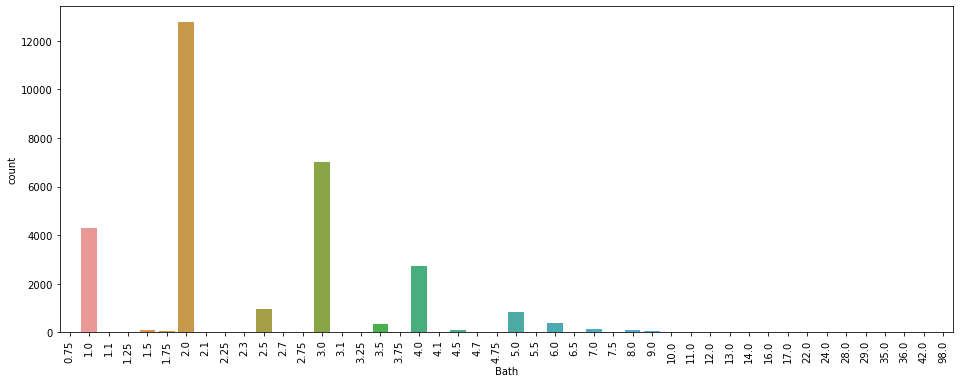

In [55]:
#Count plot of Bath
plt.figure(figsize=(16,6))
sb.countplot(x='Bath', data=df3)
plt.xticks(rotation=90)

In [56]:
## Quantitative Attributes ##

In [57]:
# **Look for outliers

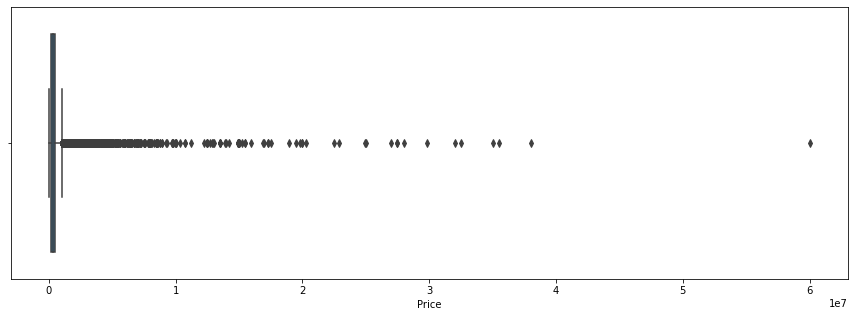

In [58]:
#Price of house

#boxplot of price
plt.figure(figsize=(15,5))
sb.boxplot(x=df3['Price'])
#lots of upper outliers -- skewed right

(array([2.9543e+04, 3.1900e+02, 7.3000e+01, 1.3000e+01, 2.5000e+01,
        9.0000e+00, 6.0000e+00, 2.0000e+00, 3.0000e+00, 4.0000e+00,
        2.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00000000e+00, 3.00000095e+06, 6.00000090e+06, 9.00000085e+06,
        1.20000008e+07, 1.50000008e+07, 1.80000007e+07, 2.10000007e+07,
        2.40000006e+07, 2.70000006e+07, 3.00000005e+07, 3.30000005e+07,
        3.60000004e+07, 3.90000004e+07, 4.20000003e+07, 4.50000002e+07,
        4.80000002e+07, 5.10000002e+07, 5.40000001e+07, 5.70000001e+07,
        6.00000000e+07]),
 <a list of 20 Patch objects>)

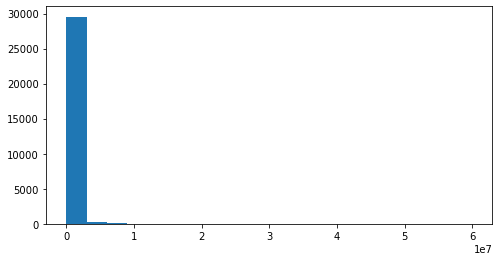

In [59]:
#histogram of price
plt.figure(figsize=(8,4))
plt.hist(x=df3['Price'], bins = 20 )

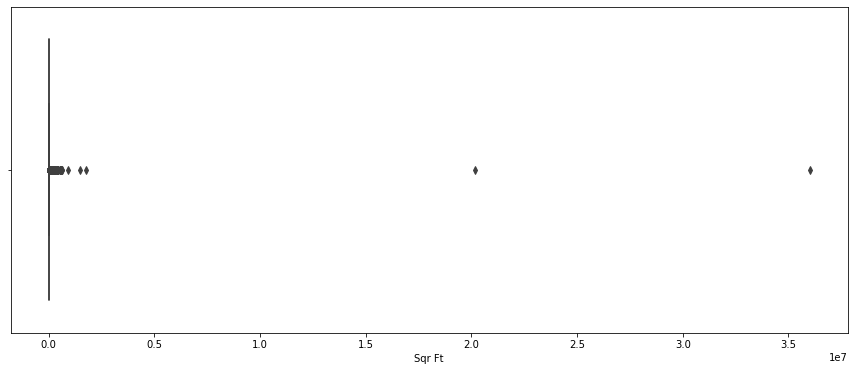

In [60]:
# Size of house (Sqr Ft)

#boxplot of Sqr Ft
plt.figure(figsize=(15,6))
sb.boxplot(x=df3['Sqr Ft'])

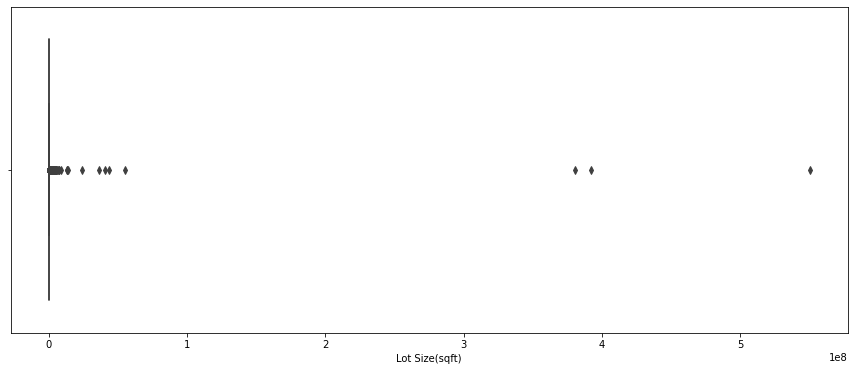

In [61]:
# Lot size

#boxplot of lot size(sqft)
plt.figure(figsize=(15,6))
sb.boxplot(x=df3['Lot Size(sqft)'])

#get rid of upper outliers

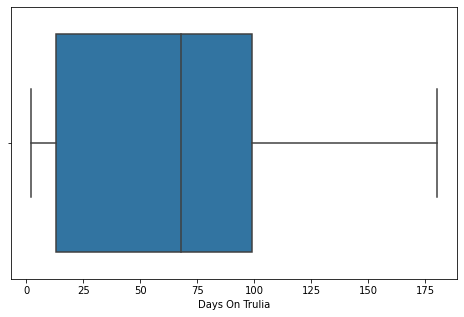

In [62]:
#boxplot of days on trulia
plt.figure(figsize=(8,5))
sb.boxplot(x=df3['Days On Trulia'])
# no outliers

(array([8764., 2747., 2140., 7051., 1184., 1293.,  902.,  909.,  685.,
        4328.]),
 array([  2. ,  19.8,  37.6,  55.4,  73.2,  91. , 108.8, 126.6, 144.4,
        162.2, 180. ]),
 <a list of 10 Patch objects>)

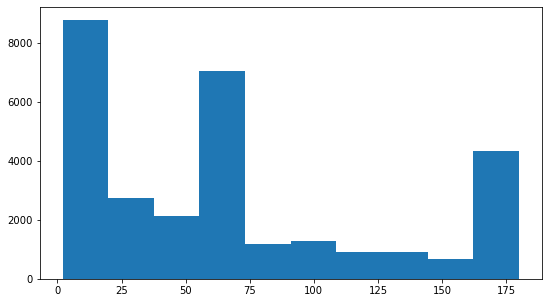

In [63]:
#histogram of Days On Trulia
plt.figure(figsize=(9,5))
plt.hist(x=df3['Days On Trulia'])

In [64]:
##Compare variables to price

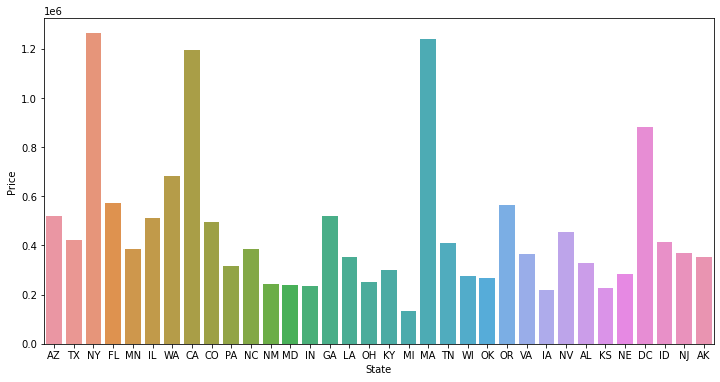

In [65]:
#bar graph of price vs state

plt.figure(figsize=(12,6))

sb.barplot(data=df3, x="State", y="Price", ci=None)

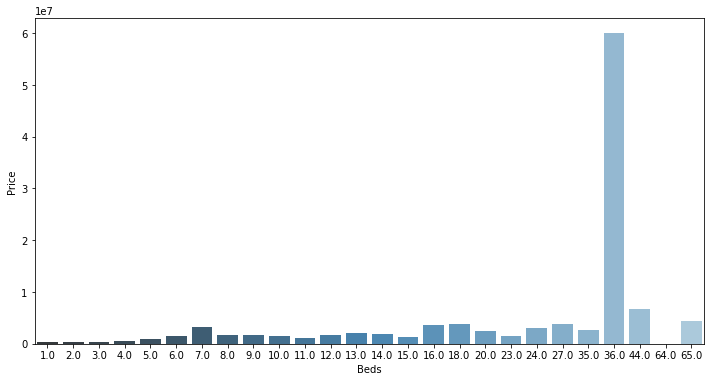

In [66]:
#bar graph of Price vs Number of Beds
plt.figure(figsize=(12,6))
sb.barplot(x='Beds',y='Price',data=df3, palette="Blues_d", ci=None)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 46 Text major ticklabel objects>)

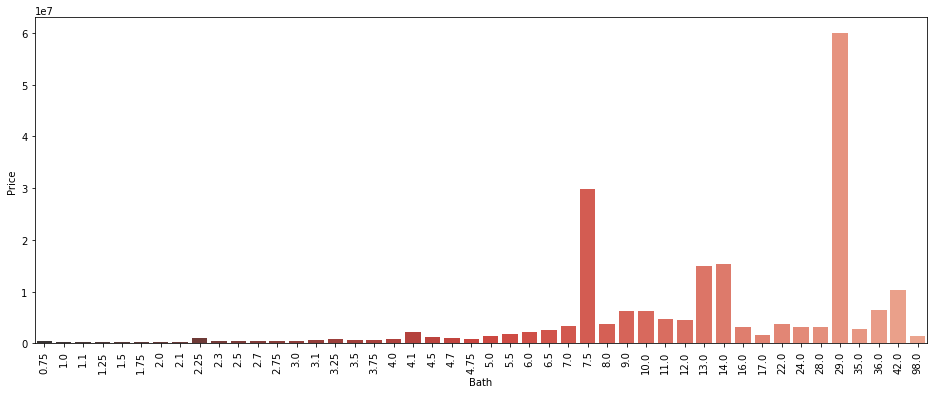

In [67]:
#bar graph of Price vs Number of Bathrooms
plt.figure(figsize=(16,6))
sb.barplot(x='Bath',y='Price',data=df3,palette='Reds_d',ci=None)
plt.xticks(rotation=90)

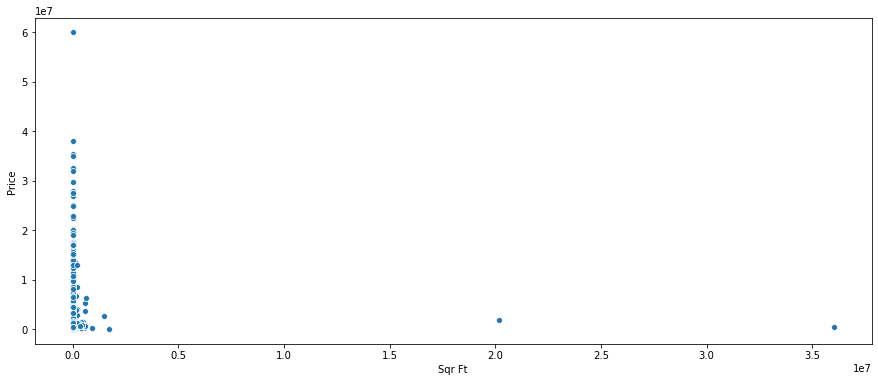

In [68]:
#scatter plot of Price vs Sqr Ft
plt.figure(figsize=(15,6))
sb.scatterplot(data=df3,x='Sqr Ft',y='Price')

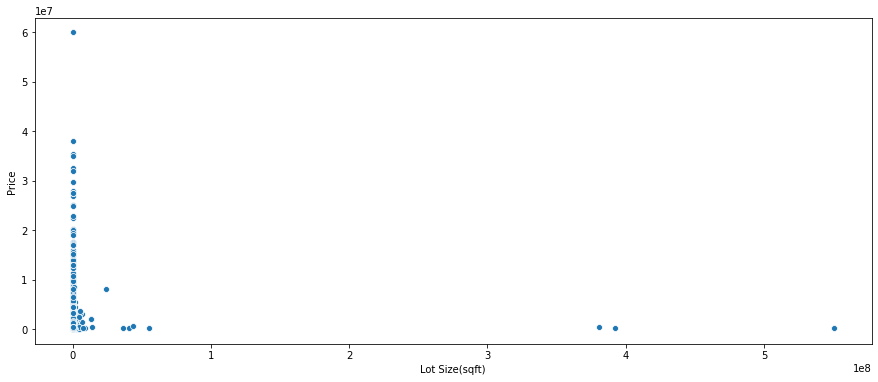

In [69]:
#scatter plot of Price vs Lot Size
plt.figure(figsize=(15,6))
sb.scatterplot(data=df3,x='Lot Size(sqft)',y='Price')

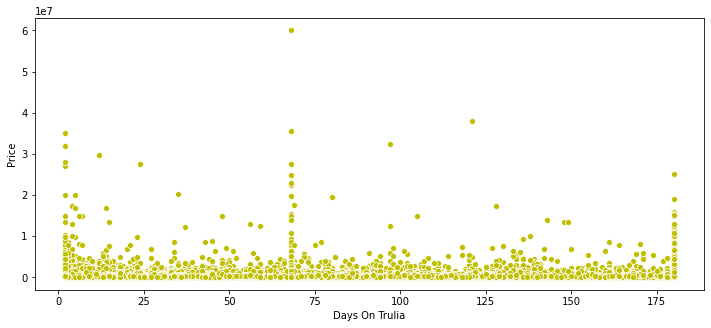

In [70]:
#scatter plot of Days On Trulia
plt.figure(figsize=(12,5))
sb.scatterplot(data=df3,x='Days On Trulia',y='Price', color='y')

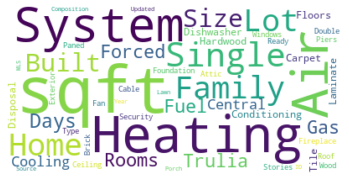

In [71]:
#wordcloud for features column
text = df3.Features[1]

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [72]:
#Regression Plots

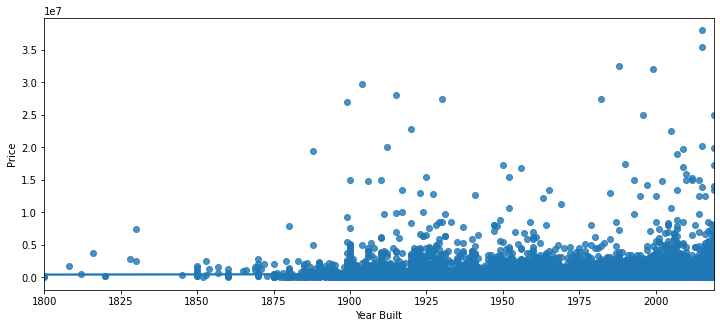

In [73]:
#regression for price vs year built
plt.figure(figsize=(12,5))
sb.regplot(x="Year Built", y="Price", data=df3)

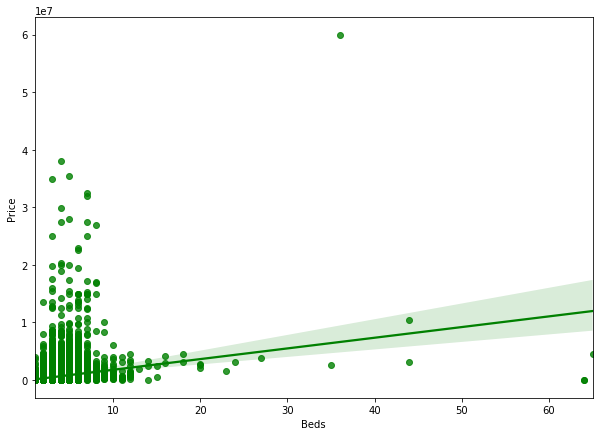

In [74]:
#regression for price vs number of bedrooms
plt.figure(figsize=(10,7))
sb.regplot(x="Beds", y="Price", data=df3, color='g')

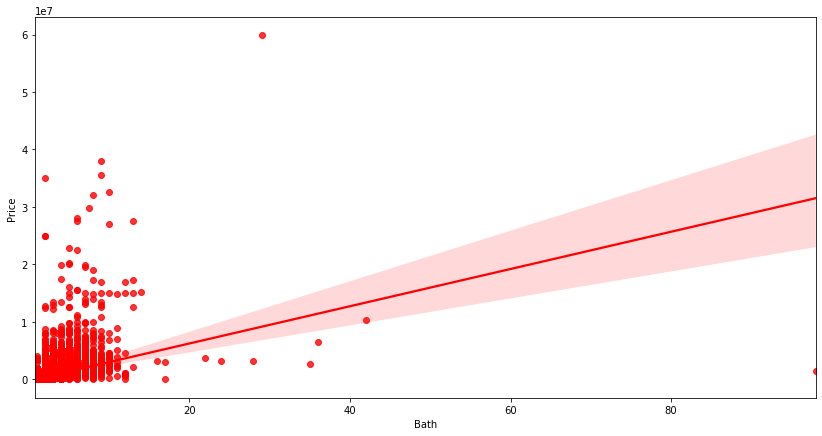

In [75]:
#regression for price vs number of bathrooms
plt.figure(figsize=(14,7))
sb.regplot(x="Bath", y="Price", data=df3, color='r')

In [76]:
##get rid of outliers...use z-score

In [77]:
#Keep "features" column? -most things in this column are already in a different attribute column except for type of house (single family, condo)

In [78]:
#Add crime data -2019
#Housing data was scraped in 2019 (Sep. 1 - Oct. 31)

In [79]:
#insert crime 2019 data -numner of violent crimes and number of property crimes
body = client_5a7f0d32e3f74da881228669190705da.get_object(Bucket='seniorproject-donotdelete-pr-6dm4jsyzpqluep',Key='2019_US_Crime_Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dfcrime = pd.read_csv(body)
dfcrime.head()


,State,City,Population,Violent Crime,Property Crime
0,AL,Hoover,85670,114.0,1922.0
1,AK,Anchorage,287731,3581.0,12261.0
2,AK,Bethel,6544,130.0,132.0
3,AK,Bristol Bay Borough,852,2.0,20.0
4,AK,Cordova,2150,0.0,7.0


In [80]:
dfcrime.shape
#8,105 rows, 4 columns/attributes

(8104, 5)

In [81]:
#check data types
dfcrime.dtypes

State              object
City               object
Population          int64
Violent Crime     float64
Property Crime    float64
dtype: object

In [82]:
#check for missing values
dfcrime.isnull().sum()

State              1
City               0
Population         0
Violent Crime     21
Property Crime    23
dtype: int64

In [83]:
print(dfcrime['City'])

0                    Hoover
1                 Anchorage
2                    Bethel
3       Bristol Bay Borough
4                   Cordova
               ...         
8099               Sheridan
8100            Thermopolis
8101             Torrington
8102              Wheatland
8103                Worland
Name: City, Length: 8104, dtype: object


In [84]:
#how many cities in each state
print(dfcrime['State'].value_counts(ascending=False))

IL    536
TX    534
NJ    488
CA    457
MI    424
NY    354
OH    334
WI    323
FL    289
MA    281
OK    278
PA    271
MN    258
MO    249
TN    246
KY    217
AR    177
NC    176
NH    163
WA    150
VA    141
SC    139
KS    133
CO    119
ME    109
IA     98
CT     94
OR     86
LA     83
GA     77
MD     75
UT     70
AZ     66
IN     63
ID     57
NM     56
VT     52
SD     51
NE     51
ND     45
RI     38
MT     35
DE     33
MS     33
WY     32
AK     27
WV     21
NV     12
HI      1
AL      1
Name: State, dtype: int64


In [85]:
#Merge housing price data and crime data
#Merge on both city and state columns
mergeddf = pd.merge(df3, dfcrime, on=['City', 'State'], how='inner')

In [86]:
mergeddf.head(20)

,Uniq Id,Price,Sqr Ft,Longitude,Latitude,Beds,Bath,Year Built,Features,Last Sold Year,...,Last Tax Year,City,State,Zipcode,Days On Trulia,Lot Size(sqft),Price per Sqft,Population,Violent Crime,Property Crime
0,d6521bac40600f17287f0a5a8b3efc8d,895900.0,3447.0,-112.081985,33.560055,4.0,4.50,2019.0,"Single Family Home | $260/sqft | Lot Size: 7,8...",NaN,...,2018.0,Phoenix,AZ,85021.0,110.0,7895.00000,259.91,1688722,11803.0,55974.0
1,c0b021f845c16f7ae098a5e105ac9217,300825.0,2537.0,-112.109130,33.772396,3.0,4.00,2005.0,"Single Family Home | $119/sqft | Lot Size: 5,4...",2018.0,...,2018.0,Phoenix,AZ,85085.0,126.0,5400.00000,118.58,1688722,11803.0,55974.0
2,b49804a33efa41bba44312df9d2ec280,1050000.0,2443.0,-111.969080,33.492996,4.0,2.00,1962.0,Single Family Home | $430/sqft | Lot Size: 0.3...,2011.0,...,2018.0,Phoenix,AZ,85018.0,3.0,14810.40000,429.80,1688722,11803.0,55974.0
3,32b631b5d0834e3bf8983b889f1eb285,490990.0,2005.0,-112.018580,33.689830,2.0,2.50,NaN,Single Family Home | $245/sqft | 180+ Days on ...,NaN,...,NaN,Phoenix,AZ,85050.0,180.0,92933.22244,244.88,1688722,11803.0,55974.0
4,81d00428d77b64bf48e90472376403c5,190000.0,1732.0,-112.215470,33.484085,4.0,2.00,1983.0,"Single Family Home | $110/sqft | Lot Size: 9,1...",2009.0,...,2018.0,Phoenix,AZ,85033.0,29.0,9165.00000,109.70,1688722,11803.0,55974.0
5,55ff0fa7116d26b0e04c642f9097b4c1,239999.0,2423.0,-112.216415,33.500114,4.0,2.00,1969.0,"Single Family Home | $99/sqft | Lot Size: 6,74...",2017.0,...,2018.0,Phoenix,AZ,85033.0,65.0,6747.00000,99.05,1688722,11803.0,55974.0
6,fb7ea2f708c39123adf16fb4dcce79d7,256000.0,2712.0,-112.217896,33.410103,5.0,4.00,2007.0,"Single Family Home | $94/sqft | Lot Size: 7,58...",2019.0,...,2018.0,Phoenix,AZ,85043.0,180.0,7584.00000,94.40,1688722,11803.0,55974.0
7,d28ef94ddd0b3d5e6798f3af6581dd9f,279900.0,1698.0,-112.082000,33.663956,4.0,2.00,1979.0,"Single Family Home | $165/sqft | Lot Size: 7,2...",NaN,...,2018.0,Phoenix,AZ,85027.0,15.0,7278.00000,164.84,1688722,11803.0,55974.0
8,60d6c27df48b36af270ab1e3b5a800d0,160000.0,1260.0,-112.103920,33.507244,3.0,2.00,1970.0,"Townhouse | $127/sqft | Lot Size: 2,622 sqft |...",2004.0,...,2018.0,Phoenix,AZ,85015.0,68.0,2622.00000,126.98,1688722,11803.0,55974.0
9,8c330e4f4778115f43f465daddaaa8f8,267900.0,1311.0,-112.080050,33.572117,3.0,1.50,1948.0,"Single Family Home | $204/sqft | Lot Size: 6,3...",2018.0,...,2018.0,Phoenix,AZ,85021.0,3.0,6320.00000,204.35,1688722,11803.0,55974.0


In [87]:
print(df3.shape)
print(mergeddf.shape)
#lost some rows after merging becuase not all the cities in the housing data were in the crime data

(30003, 19)
(22427, 22)


In [88]:
#calculate violent crime rate and property crime rate -- number of crimes/population  (add columns)
mergeddf['Violent Crime Rate'] = mergeddf['Violent Crime'] / mergeddf['Population']
mergeddf['Property Crime Rate'] = mergeddf['Property Crime'] / mergeddf['Population']
mergeddf

,Uniq Id,Price,Sqr Ft,Longitude,Latitude,Beds,Bath,Year Built,Features,Last Sold Year,...,State,Zipcode,Days On Trulia,Lot Size(sqft),Price per Sqft,Population,Violent Crime,Property Crime,Violent Crime Rate,Property Crime Rate
0,d6521bac40600f17287f0a5a8b3efc8d,895900.0,3447.0,-112.081985,33.560055,4.0,4.5,2019.0,"Single Family Home | $260/sqft | Lot Size: 7,8...",NaN,...,AZ,85021.0,110.0,7895.00000,259.91,1688722,11803.0,55974.0,0.006989,0.033146
1,c0b021f845c16f7ae098a5e105ac9217,300825.0,2537.0,-112.109130,33.772396,3.0,4.0,2005.0,"Single Family Home | $119/sqft | Lot Size: 5,4...",2018.0,...,AZ,85085.0,126.0,5400.00000,118.58,1688722,11803.0,55974.0,0.006989,0.033146
2,b49804a33efa41bba44312df9d2ec280,1050000.0,2443.0,-111.969080,33.492996,4.0,2.0,1962.0,Single Family Home | $430/sqft | Lot Size: 0.3...,2011.0,...,AZ,85018.0,3.0,14810.40000,429.80,1688722,11803.0,55974.0,0.006989,0.033146
3,32b631b5d0834e3bf8983b889f1eb285,490990.0,2005.0,-112.018580,33.689830,2.0,2.5,NaN,Single Family Home | $245/sqft | 180+ Days on ...,NaN,...,AZ,85050.0,180.0,92933.22244,244.88,1688722,11803.0,55974.0,0.006989,0.033146
4,81d00428d77b64bf48e90472376403c5,190000.0,1732.0,-112.215470,33.484085,4.0,2.0,1983.0,"Single Family Home | $110/sqft | Lot Size: 9,1...",2009.0,...,AZ,85033.0,29.0,9165.00000,109.70,1688722,11803.0,55974.0,0.006989,0.033146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22422,145fbc9b268c57ceb40cfbc6ed073f56,405959.0,2853.0,-96.105660,41.156590,4.0,3.0,NaN,Single Family Home | $142/sqft | Lot Size: 0.2...,NaN,...,NE,68046.0,3.0,10890.00000,142.29,20580,40.0,433.0,0.001944,0.021040
22423,27783db682ab9488ddde30714ff1f293,439900.0,2455.0,-80.270070,25.812885,3.0,3.0,1955.0,"Single Family Home | $179/sqft | Lot Size: 10,...",NaN,...,FL,33166.0,128.0,10125.00000,179.19,14374,36.0,381.0,0.002505,0.026506
22424,1d19ef5df394811a7e14c370f7d2111c,82650.0,1100.0,-91.128570,30.558620,3.0,2.0,NaN,Single Family Home | $75/sqft | Lot Size: 1 ac...,NaN,...,LA,70714.0,136.0,1.00000,75.14,13240,51.0,326.0,0.003852,0.024622
22425,25c7af665574de143d2722fd66b4067e,149500.0,1056.0,-83.066795,40.119820,2.0,2.0,1981.0,Condo | $142/sqft | $216/monthly HOA | Built i...,2007.0,...,OH,43065.0,68.0,92933.22244,141.57,13545,2.0,84.0,0.000148,0.006202


In [89]:
#drop number of violent crimes and property crimes columns
mergeddf.drop("Violent Crime", axis = 1, inplace=True)
mergeddf.drop("Property Crime", axis = 1, inplace=True)
mergeddf.head()

,Uniq Id,Price,Sqr Ft,Longitude,Latitude,Beds,Bath,Year Built,Features,Last Sold Year,...,Last Tax Year,City,State,Zipcode,Days On Trulia,Lot Size(sqft),Price per Sqft,Population,Violent Crime Rate,Property Crime Rate
0,d6521bac40600f17287f0a5a8b3efc8d,895900.0,3447.0,-112.081985,33.560055,4.0,4.5,2019.0,"Single Family Home | $260/sqft | Lot Size: 7,8...",NaN,...,2018.0,Phoenix,AZ,85021.0,110.0,7895.00000,259.91,1688722,0.006989,0.033146
1,c0b021f845c16f7ae098a5e105ac9217,300825.0,2537.0,-112.109130,33.772396,3.0,4.0,2005.0,"Single Family Home | $119/sqft | Lot Size: 5,4...",2018.0,...,2018.0,Phoenix,AZ,85085.0,126.0,5400.00000,118.58,1688722,0.006989,0.033146
2,b49804a33efa41bba44312df9d2ec280,1050000.0,2443.0,-111.969080,33.492996,4.0,2.0,1962.0,Single Family Home | $430/sqft | Lot Size: 0.3...,2011.0,...,2018.0,Phoenix,AZ,85018.0,3.0,14810.40000,429.80,1688722,0.006989,0.033146
3,32b631b5d0834e3bf8983b889f1eb285,490990.0,2005.0,-112.018580,33.689830,2.0,2.5,NaN,Single Family Home | $245/sqft | 180+ Days on ...,NaN,...,NaN,Phoenix,AZ,85050.0,180.0,92933.22244,244.88,1688722,0.006989,0.033146
4,81d00428d77b64bf48e90472376403c5,190000.0,1732.0,-112.215470,33.484085,4.0,2.0,1983.0,"Single Family Home | $110/sqft | Lot Size: 9,1...",2009.0,...,2018.0,Phoenix,AZ,85033.0,29.0,9165.00000,109.70,1688722,0.006989,0.033146


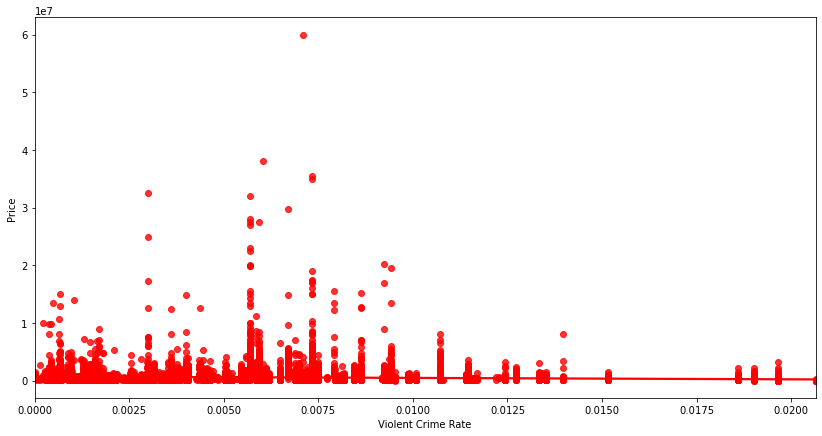

In [90]:
#regression for price vs violent crime rate
plt.figure(figsize=(14,7))
sb.regplot(x="Violent Crime Rate", y="Price", data=mergeddf, color='r')

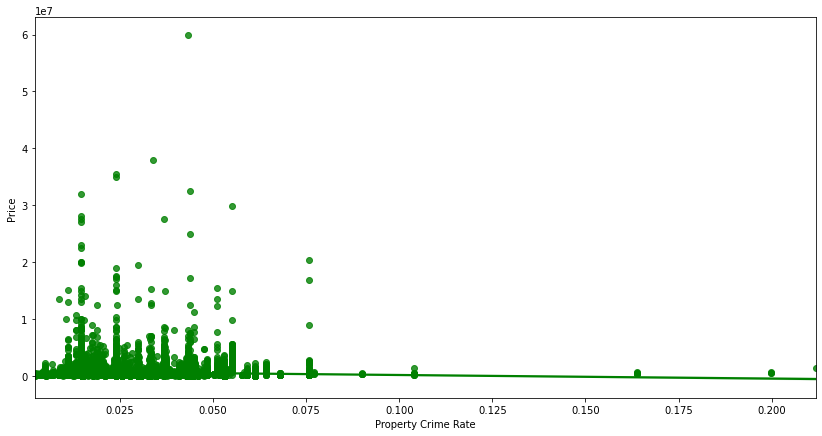

In [91]:
#regression for price vs property crime rate
plt.figure(figsize=(14,7))
sb.regplot(x="Property Crime Rate", y="Price", data=mergeddf, color='g')

In [92]:
#some upper outliers

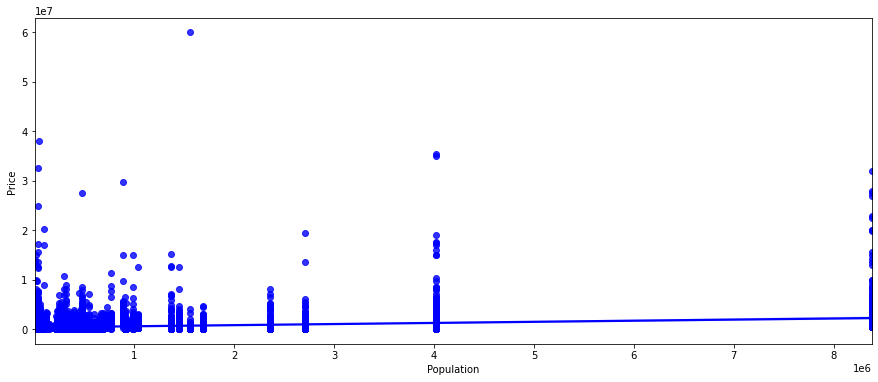

In [93]:
#regression for price vs population
plt.figure(figsize=(15,6))
sb.regplot(x="Population", y="Price", data=mergeddf, color='b')

In [94]:
#Phoenix has largest population
mergeddf[['City','Population']].max

<bound method DataFrame.max of                 City  Population
0            Phoenix     1688722
1            Phoenix     1688722
2            Phoenix     1688722
3            Phoenix     1688722
4            Phoenix     1688722
...              ...         ...
22422      Papillion       20580
22423  Miami Springs       14374
22424          Baker       13240
22425         Powell       13545
22426         Luther        1834

[22427 rows x 2 columns]>

In [95]:
#Which city has the highest violent crime rate?
mergeddf[['City','State','Violent Crime Rate']].sort_values(by=['Violent Crime Rate'],ascending=False)

,City,State,Violent Crime Rate
20956,Highland Park,MI,0.020648
20968,Highland Park,MI,0.020648
20957,Highland Park,MI,0.020648
20958,Highland Park,MI,0.020648
20959,Highland Park,MI,0.020648
...,...,...,...
22355,Garden Ridge,TX,0.000000
21322,Indian Hills,KY,0.000000
21323,Indian Hills,KY,0.000000
22072,Northfield,KY,0.000000


In [96]:
#Which city has the highest property crime rate?
mergeddf[['City','State','Property Crime Rate']].sort_values(by=['Property Crime Rate'],ascending=False)

,City,State,Property Crime Rate
22401,Emeryville,CA,0.211874
22065,Medley,FL,0.199777
22066,Medley,FL,0.199777
22067,Medley,FL,0.199777
22073,Tukwila,WA,0.163902
...,...,...,...
20282,Albuquerque,NM,NaN
20283,Albuquerque,NM,NaN
20284,Albuquerque,NM,NaN
20285,Albuquerque,NM,NaN


In [97]:
#deal with missing values in crime data

In [98]:
#check for missing values
mergeddf.isnull().sum()

Uniq Id                    0
Price                      0
Sqr Ft                     0
Longitude                  0
Latitude                   0
Beds                       0
Bath                       0
Year Built              2859
Features                   0
Last Sold Year         12340
Last Sold For          12340
Last Tax Assestment     9520
Last Tax Year           9557
City                       0
State                      0
Zipcode                    0
Days On Trulia             0
Lot Size(sqft)             0
Price per Sqft             0
Population                 0
Violent Crime Rate         0
Property Crime Rate      251
dtype: int64

In [99]:
#replace missing values for Property Crime Rate with the mean
mean=mergeddf["Property Crime Rate"].mean()
mergeddf["Property Crime Rate"].fillna(mean, inplace=True)

print(mean)
print(mergeddf[['Property Crime Rate']])

0.033387507754866395
       Property Crime Rate
0                 0.033146
1                 0.033146
2                 0.033146
3                 0.033146
4                 0.033146
...                    ...
22422             0.021040
22423             0.026506
22424             0.024622
22425             0.006202
22426             0.005453

[22427 rows x 1 columns]


In [100]:
#replace missing values for Property Crime Rate with the mean
mean=mergeddf["Year Built"].mean()
mean=mean.round()
mergeddf["Year Built"].fillna(mean, inplace=True)

print(mean)
print(mode)
print(mergeddf[['Year Built']])

1975.0
0    2019.0
dtype: float64
       Year Built
0          2019.0
1          2005.0
2          1962.0
3          1975.0
4          1983.0
...           ...
22422      1975.0
22423      1955.0
22424      1975.0
22425      1981.0
22426      2010.0

[22427 rows x 1 columns]


In [101]:
mergeddf.dtypes

Uniq Id                 object
Price                  float64
Sqr Ft                 float64
Longitude              float64
Latitude               float64
Beds                   float64
Bath                   float64
Year Built             float64
Features                object
Last Sold Year         float64
Last Sold For          float64
Last Tax Assestment    float64
Last Tax Year          float64
City                    object
State                   object
Zipcode                float64
Days On Trulia         float64
Lot Size(sqft)         float64
Price per Sqft         float64
Population               int64
Violent Crime Rate     float64
Property Crime Rate    float64
dtype: object

In [102]:
#define file to be exported
exportdf = pd.DataFrame(mergeddf, columns= ['Uniq Id', 'Price','Sqr Ft','Beds','Bath','Year Built','Features','City',
            'State','Days On Trulia','Lot Size(sqft)','Price per Sqft','Population','Violent Crime Rate','Property Crime Rate'])


In [103]:
# Export mergeddf as a csv file to project assets

#@hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='e5b5564f-3061-4776-af66-2ba2d1874948', project_access_token='p-afce1f171120edb3c4d766e0d3b5a708f5fbf7d5')
pc = project.project_context

# save in your object storage as a csv file
project.save_data("housing_crime_merged.csv", exportdf.to_csv(index=False),overwrite = True)


{'file_name': 'housing_crime_merged.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'seniorproject-donotdelete-pr-6dm4jsyzpqluep',
 'asset_id': 'de582f01-c9c7-4cd6-aeb9-c4a5c4972b7e'}